# Used Car Price Prediction on Real-World Data

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from xgboost import XGBRegressor

### Reading dataset

In [5]:
df=pd.read_csv("used_vechiles_regression.csv")
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

#### Data Cleaning & EDA

In [8]:
# Dropping un-necessary columns
df.drop(['id','url','region_url','image_url','description','VIN','county','posting_date','lat', 'long'], axis=1, inplace=True)

In [9]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


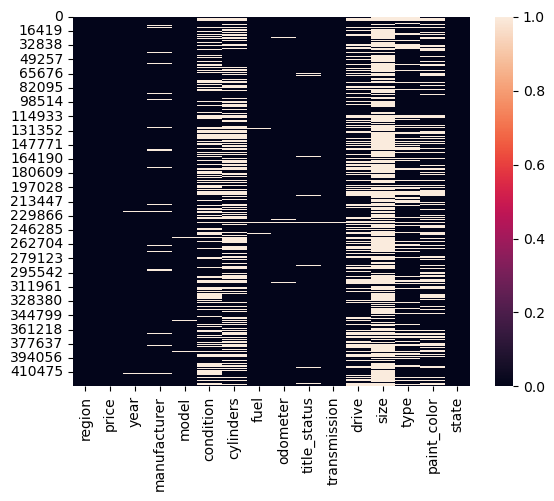

In [10]:
sns.heatmap(df.isna())
plt.show()

In [11]:
# Checking for null values
(df.isna().sum()*100/len(df)).sort_values(ascending=False)

size            71.767476
cylinders       41.622470
condition       40.785232
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
region           0.000000
price            0.000000
state            0.000000
dtype: float64

In [12]:
# Looking for unique values in some categorical columns
df['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [13]:
df['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

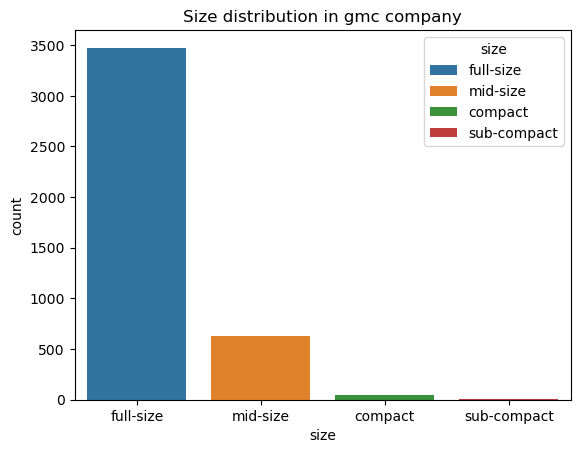

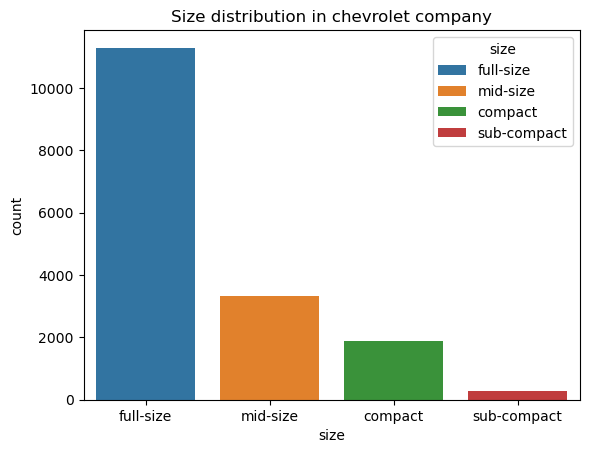

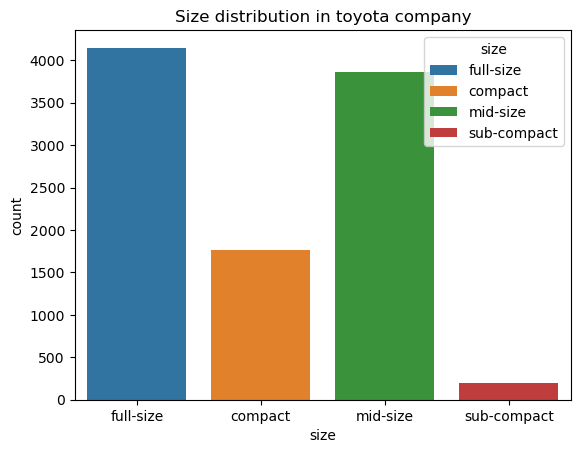

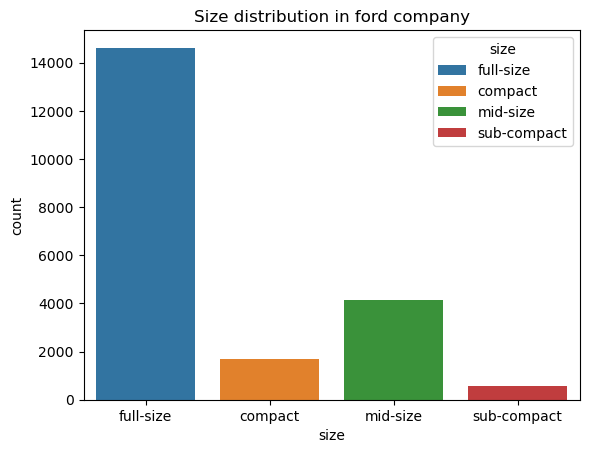

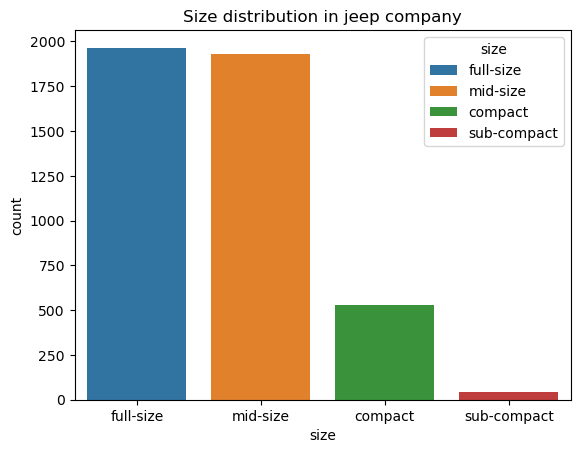

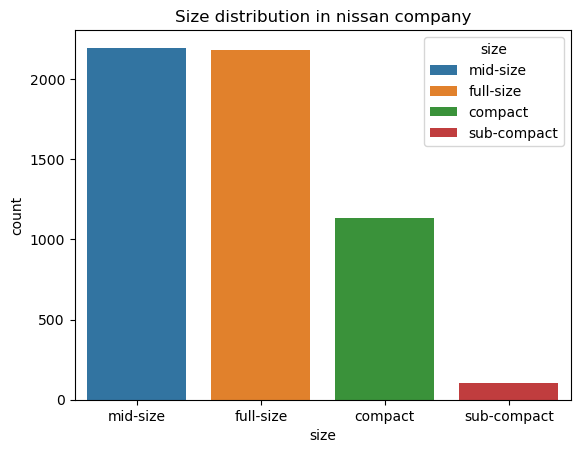

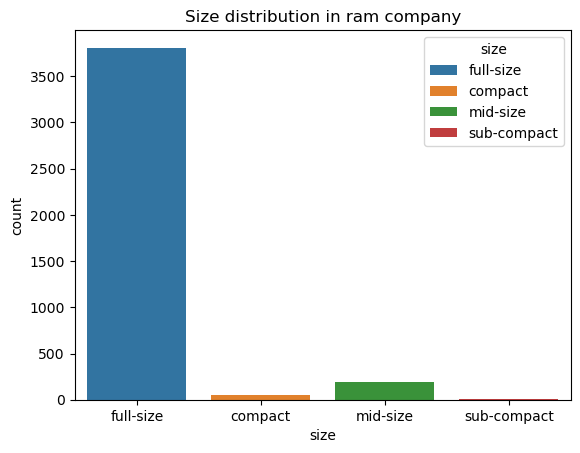

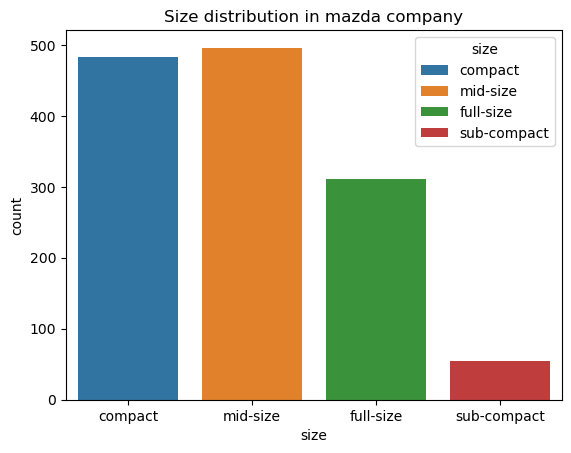

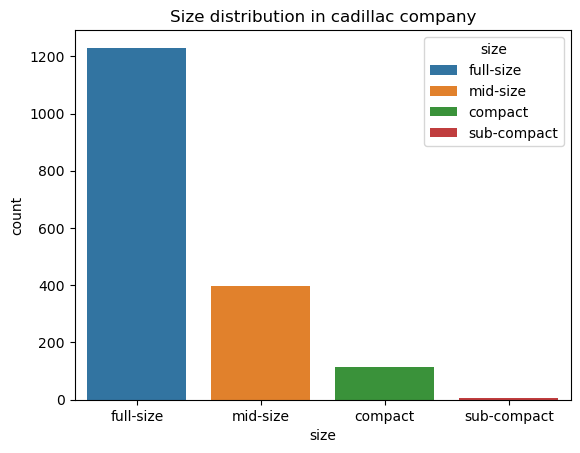

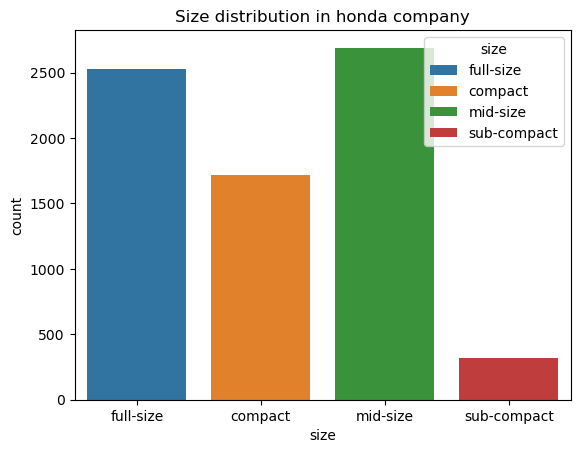

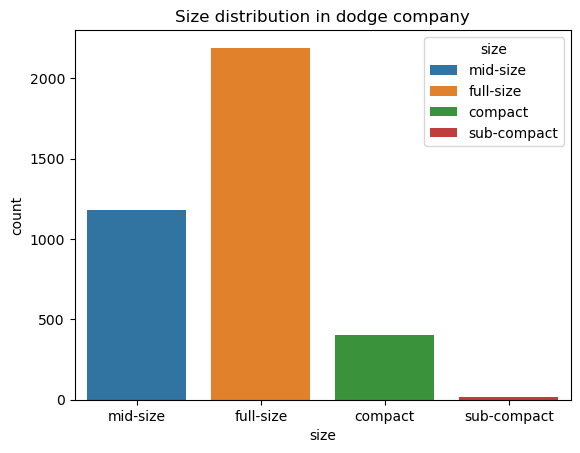

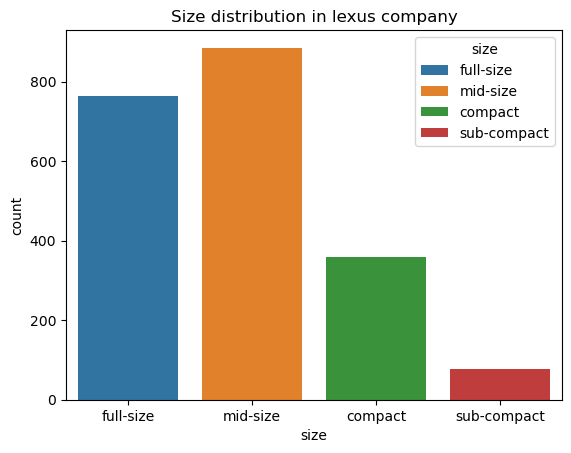

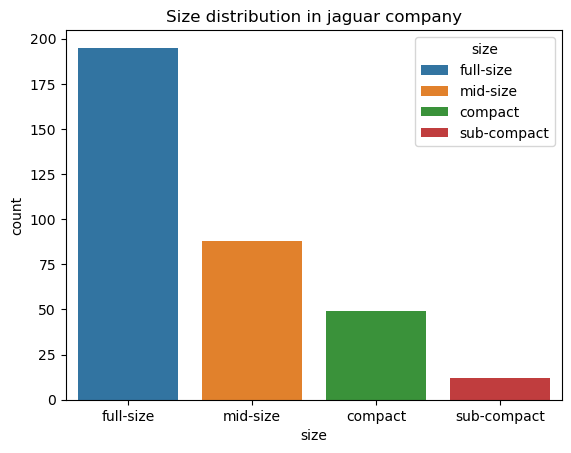

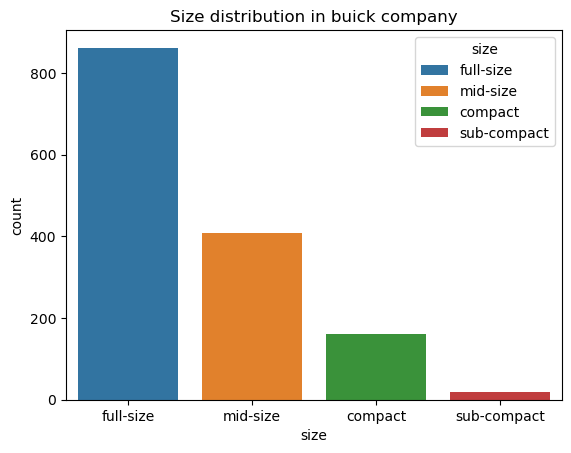

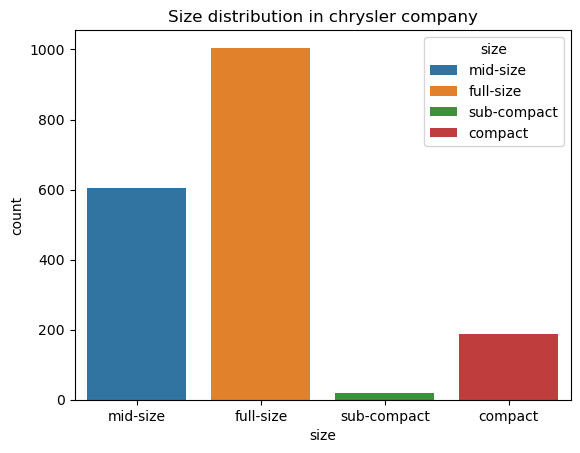

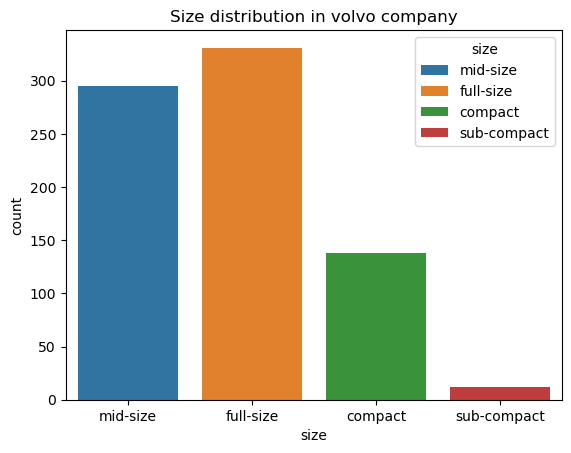

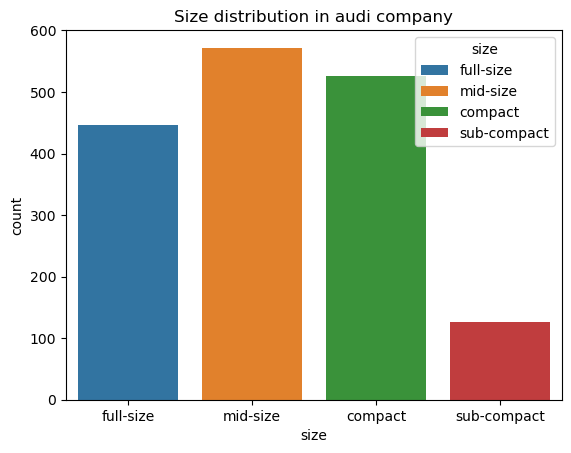

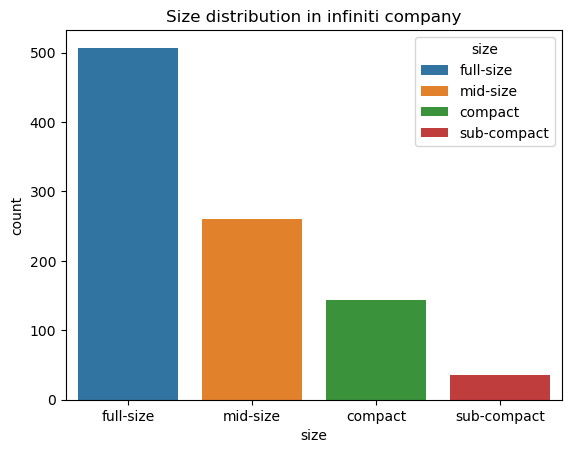

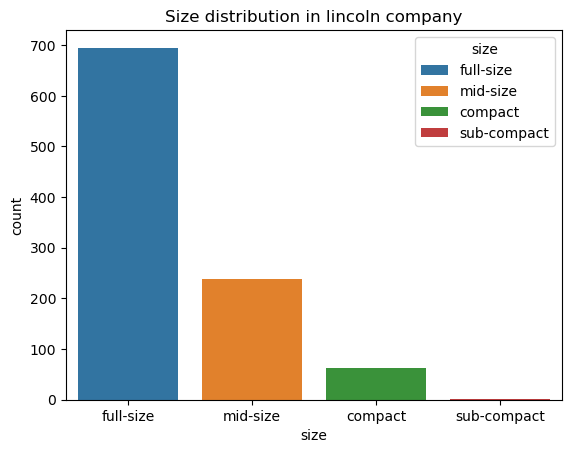

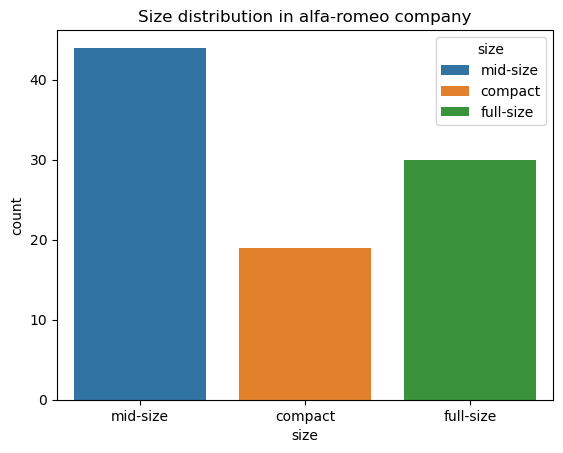

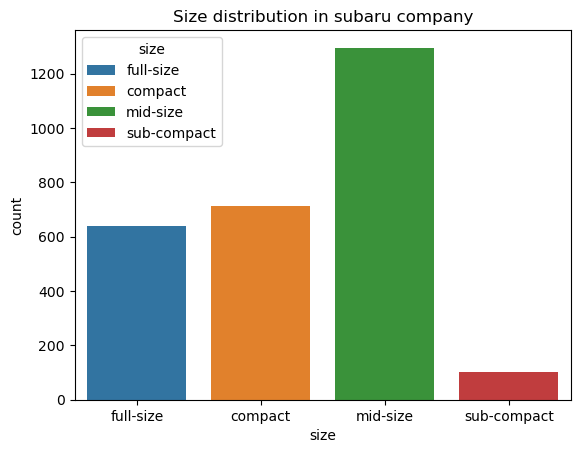

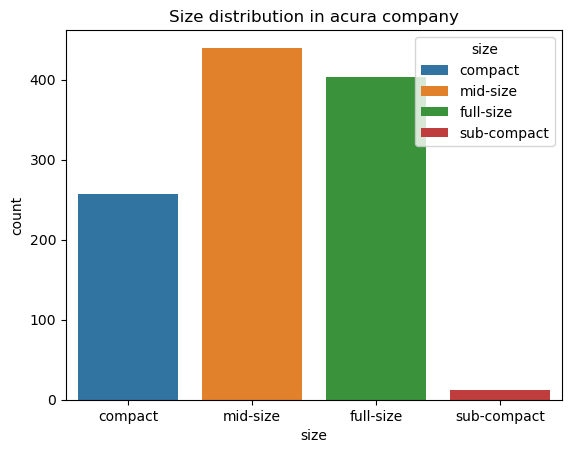

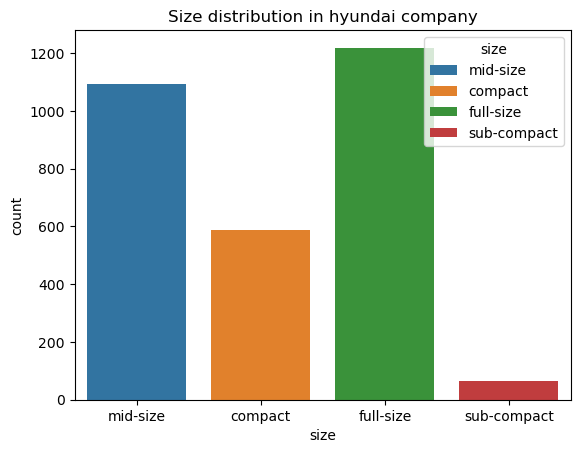

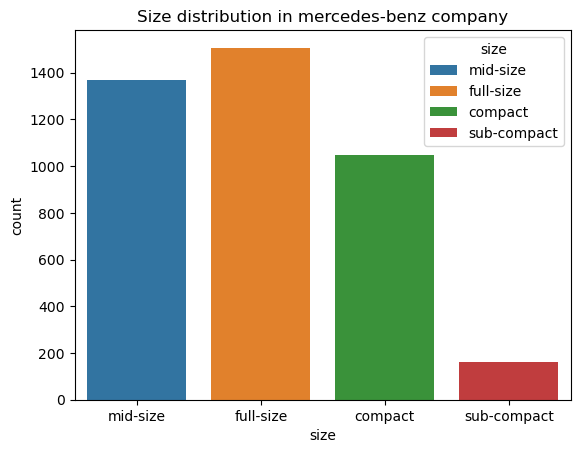

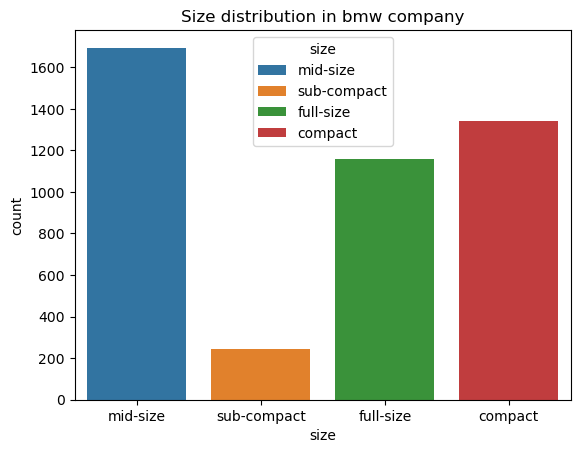

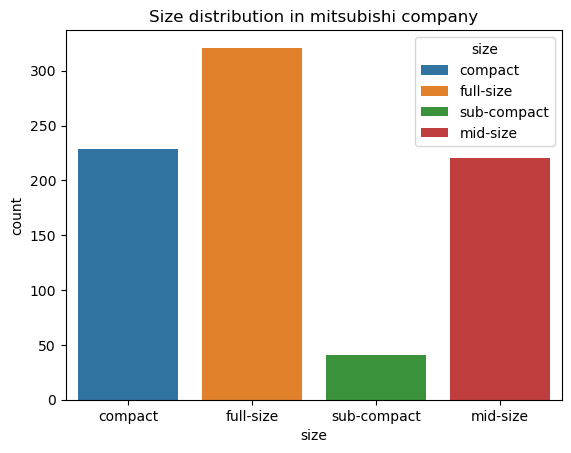

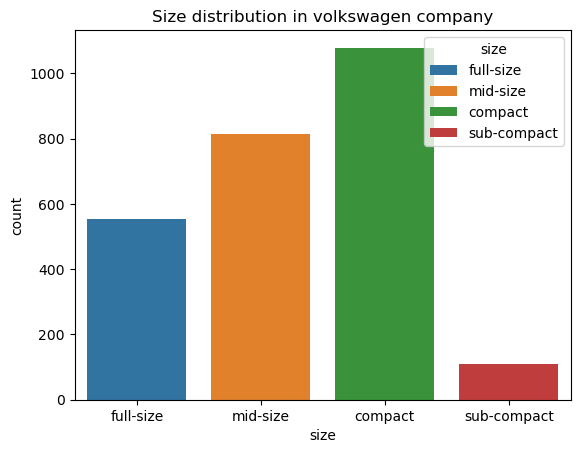

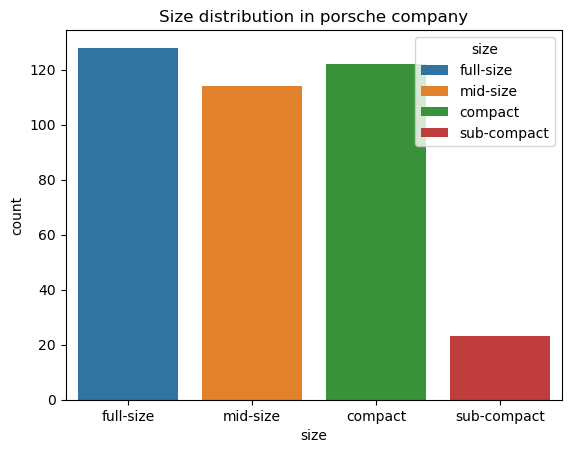

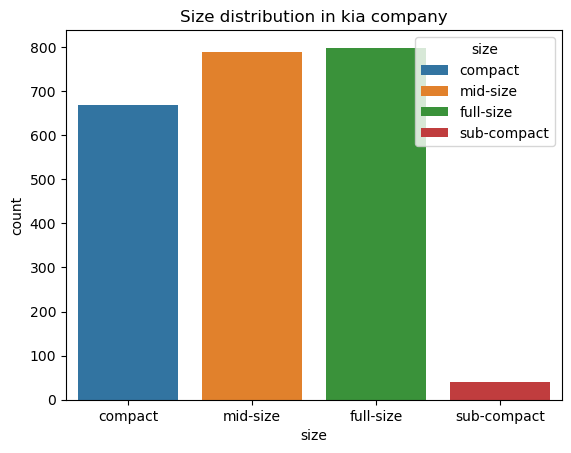

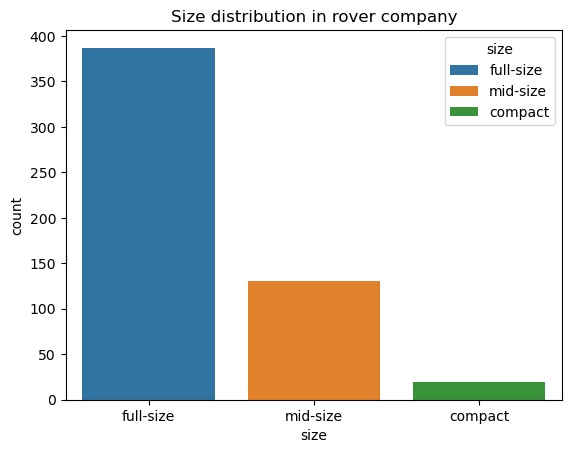

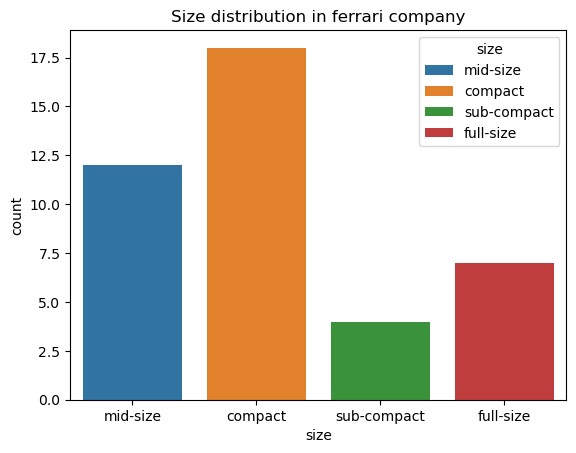

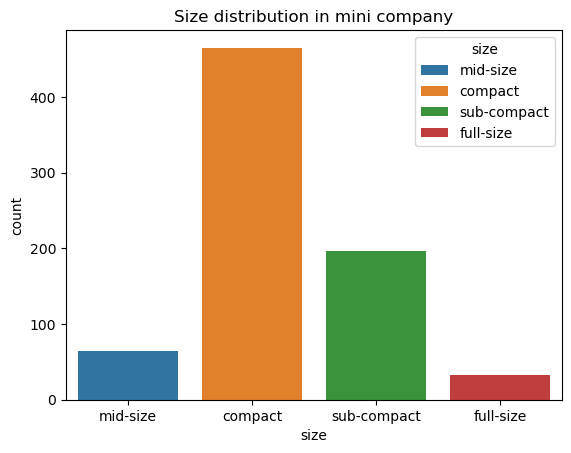

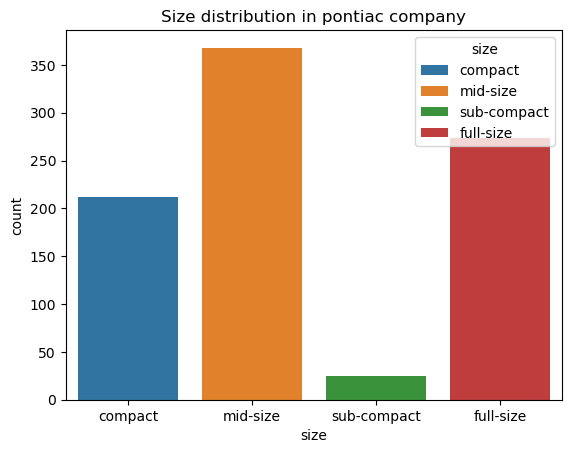

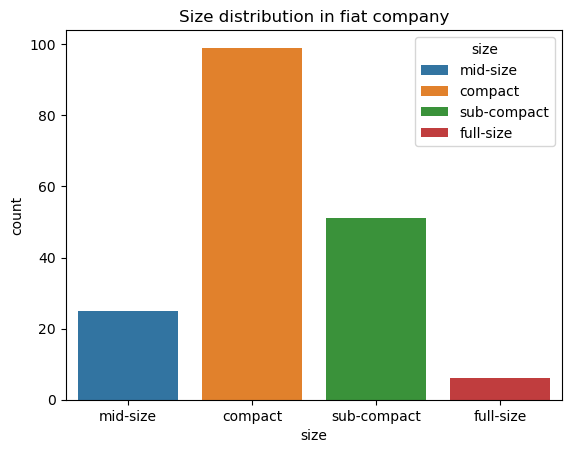

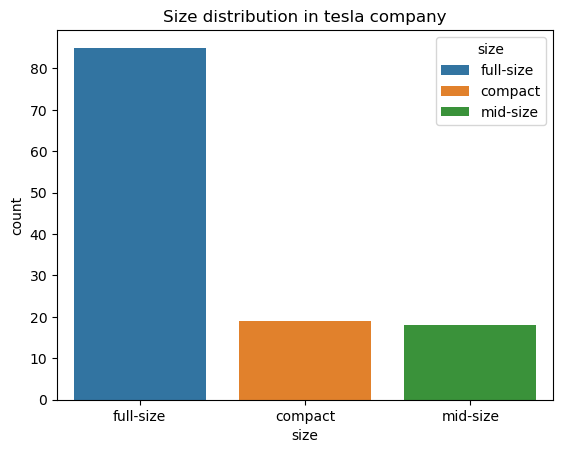

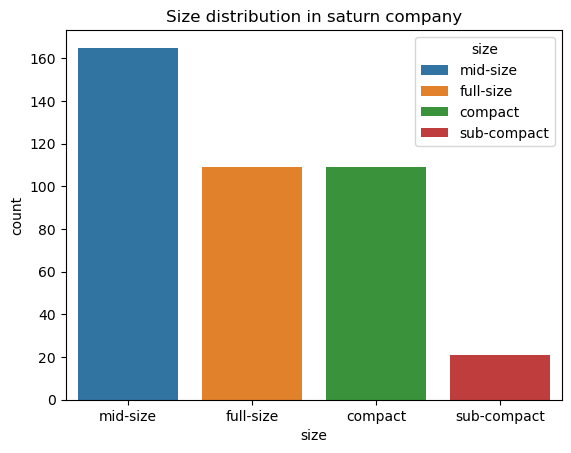

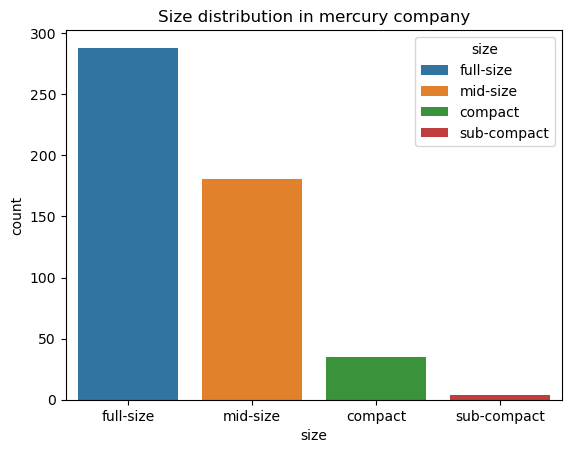

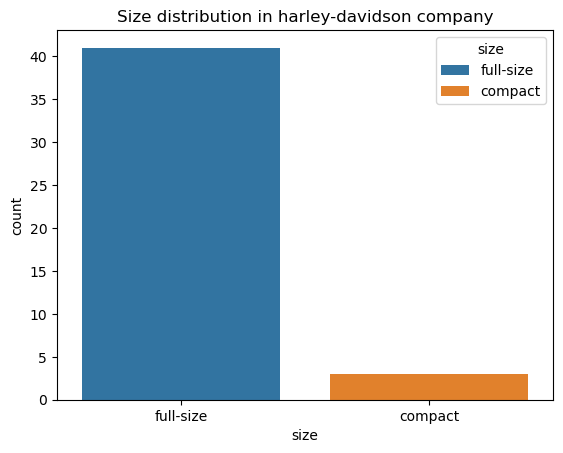

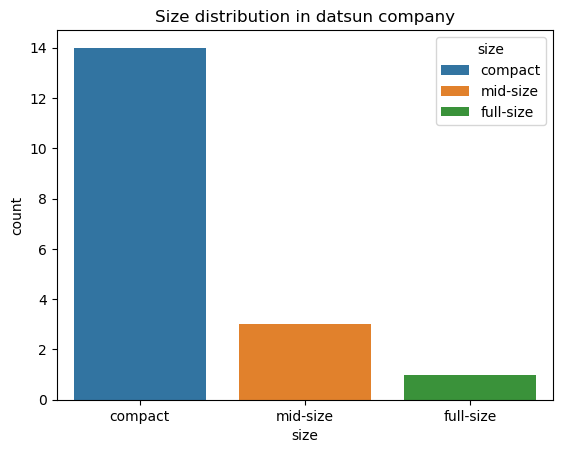

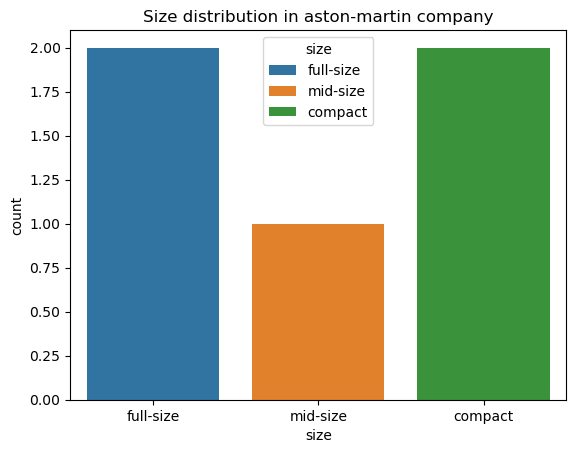

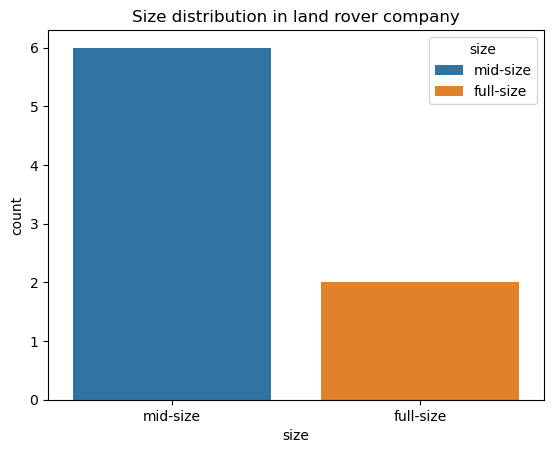

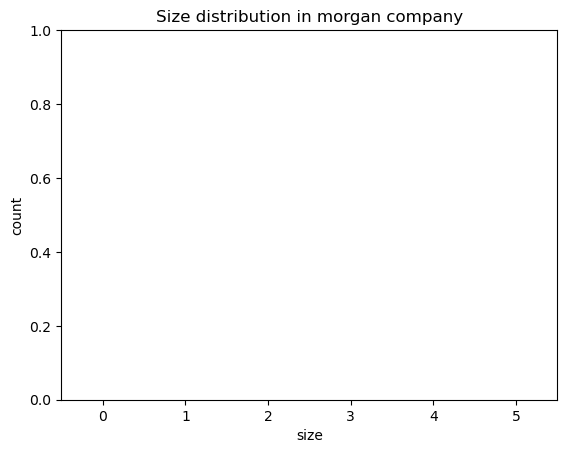

In [14]:
for aa in df["manufacturer"].dropna().unique():
    sns.countplot(data=df[df["manufacturer"] == aa],x='size', hue='size')
    plt.title(f"Size distribution in {aa} company")
    plt.show()

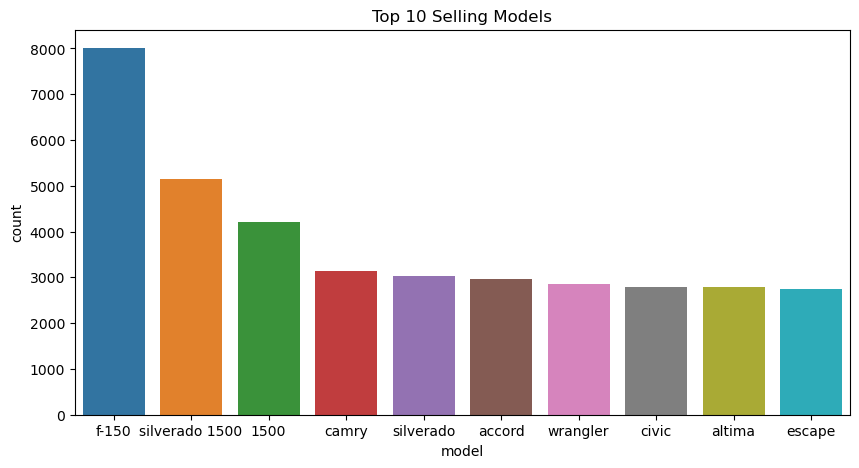

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['model'].value_counts()[:10].index,y=df['model'].value_counts()[:10],hue=df['model'].value_counts()[:10].index)
plt.title("Top 10 Selling Models")
plt.show()

In [16]:
# Imputing null valued columns
df['manufacturer']=df['manufacturer'].fillna(df['manufacturer'].mode()[0])

In [17]:
df['size'] = df.groupby("manufacturer")['size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

/tmp/ipykernel_1203/2008347065.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['size'] = df.groupby("manufacturer")['size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [18]:
(df.isna().sum()*100/len(df)).sort_values(ascending=False)

cylinders       41.622470
condition       40.785232
drive           30.586347
paint_color     30.501078
type            21.752717
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
size             0.000703
region           0.000000
price            0.000000
manufacturer     0.000000
state            0.000000
dtype: float64

In [19]:
df['cylinders'].value_counts().sort_values()

cylinders
12 cylinders      209
3 cylinders       655
other            1298
10 cylinders     1455
5 cylinders      1712
8 cylinders     72062
4 cylinders     77642
6 cylinders     94169
Name: count, dtype: int64

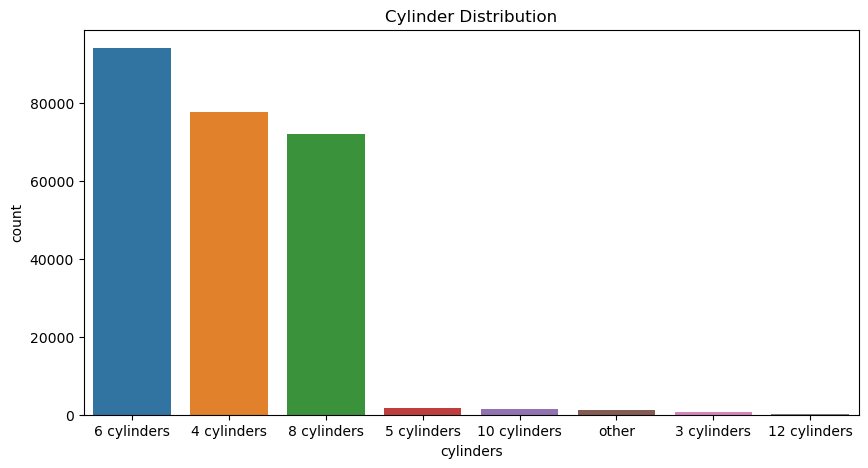

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["cylinders"].value_counts().index,y=df["cylinders"].value_counts(),hue=df["cylinders"].value_counts().index)
plt.title("Cylinder Distribution")
plt.show()

In [21]:
df['cylinders'].mode()[0]

'6 cylinders'

In [22]:
df['cylinders']=df['cylinders'].fillna(df['cylinders'].mode()[0])

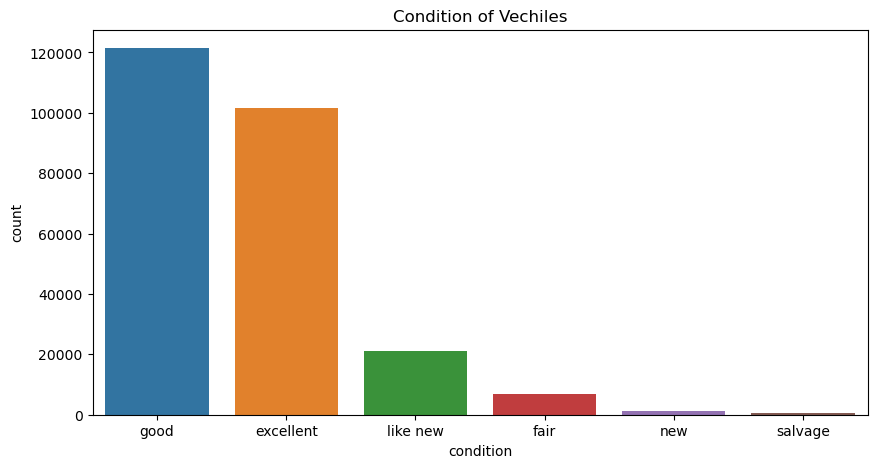

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["condition"].value_counts().index,y=df['condition'].value_counts(),hue=df['condition'].value_counts().index)
plt.title("Condition of Vechiles")
plt.show()

In [24]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,ford,NaN,NaN,6 cylinders,NaN,NaN,NaN,NaN,NaN,full-size,NaN,NaN,az
1,fayetteville,11900,NaN,ford,NaN,NaN,6 cylinders,NaN,NaN,NaN,NaN,NaN,full-size,NaN,NaN,ar
2,florida keys,21000,NaN,ford,NaN,NaN,6 cylinders,NaN,NaN,NaN,NaN,NaN,full-size,NaN,NaN,fl
3,worcester / central MA,1500,NaN,ford,NaN,NaN,6 cylinders,NaN,NaN,NaN,NaN,NaN,full-size,NaN,NaN,ma
4,greensboro,4900,NaN,ford,NaN,NaN,6 cylinders,NaN,NaN,NaN,NaN,NaN,full-size,NaN,NaN,nc


In [25]:
df['year'].value_counts()

year
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1909.0        1
Name: count, Length: 114, dtype: int64

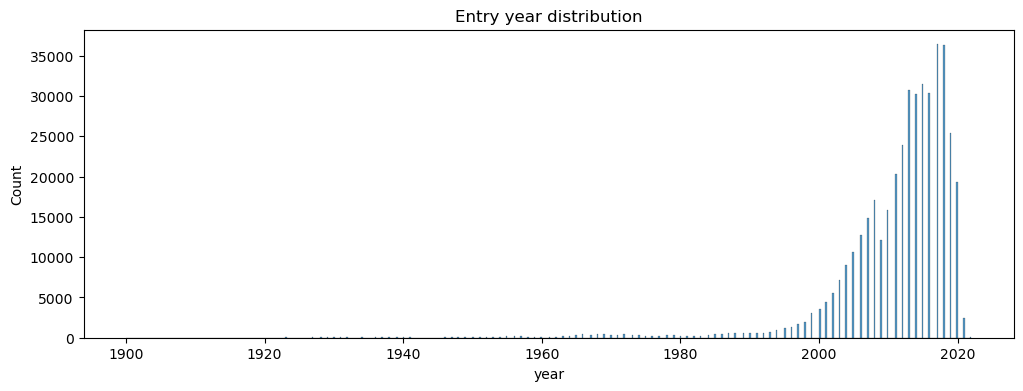

In [26]:
plt.figure(figsize=(12,4))
sns.histplot(data=df,x="year")
plt.title("Entry year distribution")
plt.show()

In [27]:
df['condition']=df.groupby("year")['condition'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

/tmp/ipykernel_1203/1448545166.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['condition']=df.groupby("year")['condition'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [28]:
(df.isna().sum()).sort_values(ascending=False)

drive           130567
paint_color     130203
type             92858
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
condition         1219
year              1205
size                 3
region               0
price                0
manufacturer         0
cylinders            0
state                0
dtype: int64

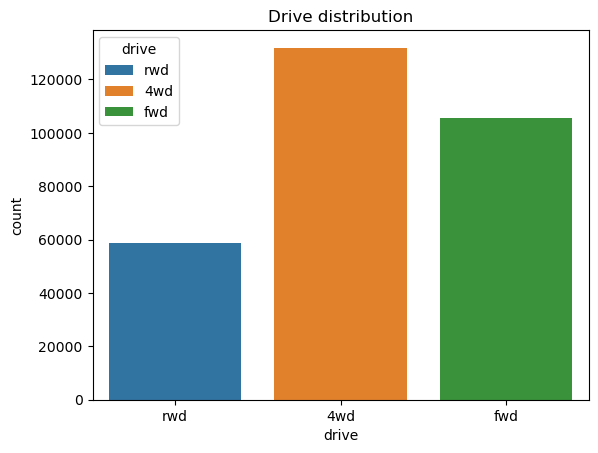

In [29]:
sns.countplot(data=df,x='drive', hue='drive')
plt.title("Drive distribution")
plt.show()

In [30]:
df['drive']=df.groupby("manufacturer")['drive'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

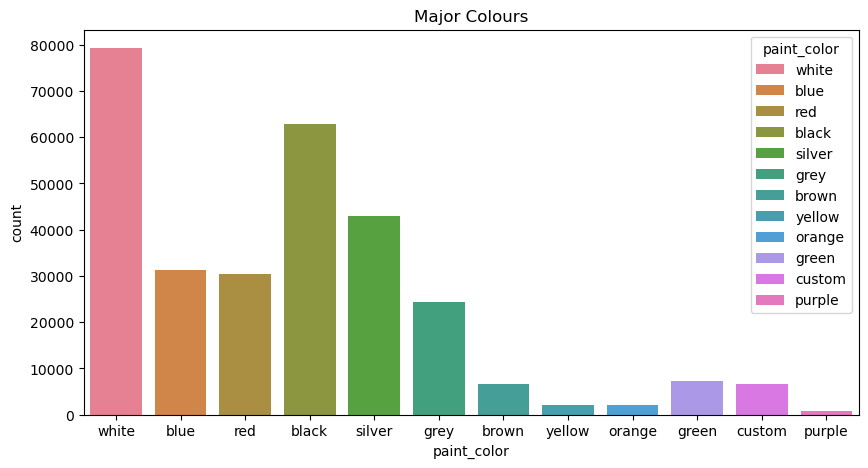

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="paint_color",hue="paint_color")
plt.title("Major Colours")
plt.show()

In [32]:
df['paint_color']=df['paint_color'].fillna(df['paint_color'].mode()[0])

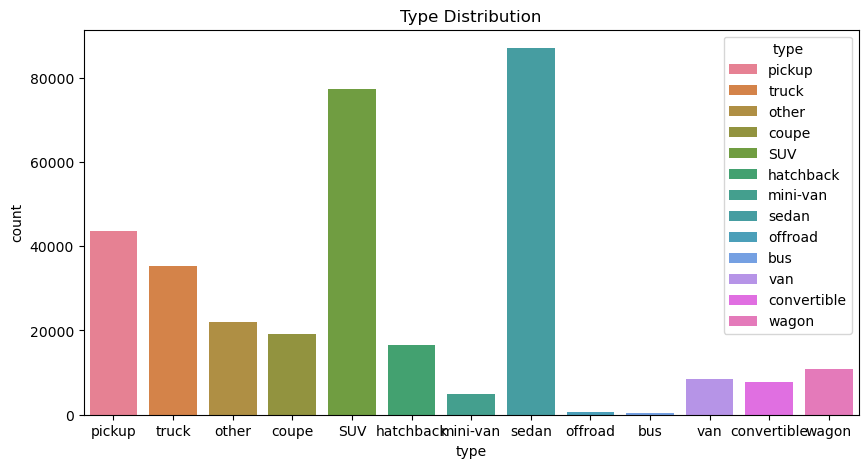

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="type",hue="type")
plt.title("Type Distribution")
plt.show()

In [34]:
df["type"]=df.groupby("manufacturer")['type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [35]:
(df.isna().sum()*100/len(df)).sort_values(ascending=False)

title_status    1.930753
model           1.236179
odometer        1.030735
fuel            0.705819
transmission    0.598763
condition       0.285560
year            0.282281
size            0.000703
region          0.000000
price           0.000000
manufacturer    0.000000
cylinders       0.000000
drive           0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

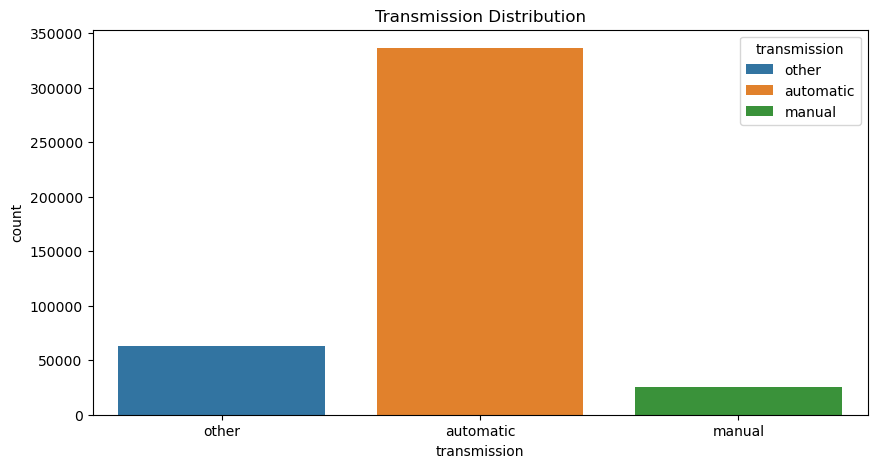

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="transmission",hue="transmission")
plt.title("Transmission Distribution")
plt.show()

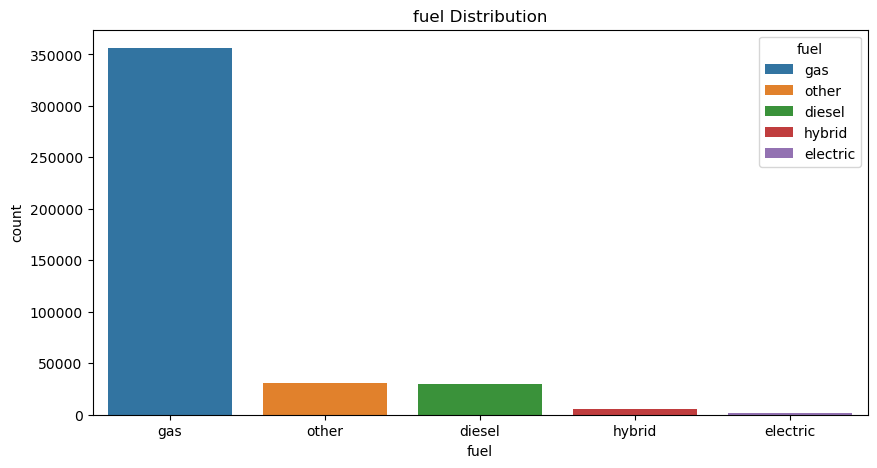

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="fuel",hue="fuel")
plt.title("fuel Distribution")
plt.show()

In [38]:
original=len(df)
df.dropna(inplace=True)
print(f"Original: {original}, New: {len(df)}, Entries dropped: ",original-len(df))

Original: 426880, New: 405592, Entries dropped:  21288


In [39]:
df.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [40]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,full-size,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,full-size,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,full-size,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,fwd,full-size,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,mid-size,sedan,white,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,fwd,full-size,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,clean,other,4wd,full-size,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,mid-size,sedan,silver,wy


In [41]:
df['year']=df['year'].apply(int)

In [42]:
df['cylinders'].value_counts()

cylinders
6 cylinders     258633
4 cylinders      73543
8 cylinders      68535
5 cylinders       1659
10 cylinders      1386
other             1033
3 cylinders        609
12 cylinders       194
Name: count, dtype: int64

In [43]:
df['cylinders']=np.where(df['cylinders']=="other",df['cylinders'].mode()[0],df['cylinders'])
df['cylinders'].value_counts()

cylinders
6 cylinders     259666
4 cylinders      73543
8 cylinders      68535
5 cylinders       1659
10 cylinders      1386
3 cylinders        609
12 cylinders       194
Name: count, dtype: int64

In [44]:
def extract(x):
    x=x.split()[0]
    return int(x)

In [45]:
df['cylinders']=df['cylinders'].apply(extract)
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,4wd,full-size,pickup,white,al
28,auburn,22590,2010,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,4wd,full-size,pickup,blue,al
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,4wd,full-size,pickup,red,al
30,auburn,30990,2017,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,fwd,full-size,pickup,red,al
31,auburn,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6,gas,32226.0,clean,other,fwd,mid-size,sedan,white,wy
426876,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,6,gas,12029.0,clean,other,fwd,full-size,sedan,red,wy
426877,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,6,diesel,4174.0,clean,other,4wd,full-size,hatchback,white,wy
426878,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6,gas,30112.0,clean,other,fwd,mid-size,sedan,silver,wy


In [46]:
cat_col=df.select_dtypes(object).columns.to_list()
cat_col

['region',
 'manufacturer',
 'model',
 'condition',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [47]:
for f in cat_col:
    print(f, df[f].nunique())

region 404
manufacturer 41
model 27512
condition 6
fuel 5
title_status 6
transmission 3
drive 3
size 4
type 13
paint_color 12
state 51


In [48]:
num_col=df.select_dtypes(include=["int","float"]).columns.tolist()
num_col

['price', 'year', 'cylinders', 'odometer']

#### Outlier Detection

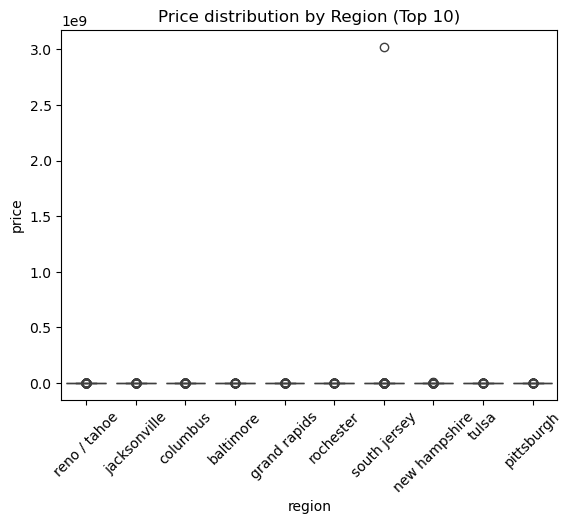

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

top_regions = df['region'].value_counts().index[:10]
sns.boxplot(x='region', y='price', data=df[df['region'].isin(top_regions)])
plt.xticks(rotation=45)
plt.title("Price distribution by Region (Top 10)")
plt.show()


In [50]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

original=len(df)
df_clean=df[(df['price']>=lower_bound)& (df['price']<=upper_bound)]
print(f"original: {original}, new: {len(df_clean)} Entries dropped: ",original-len(df_clean))

original: 405592, new: 398295 Entries dropped:  7297


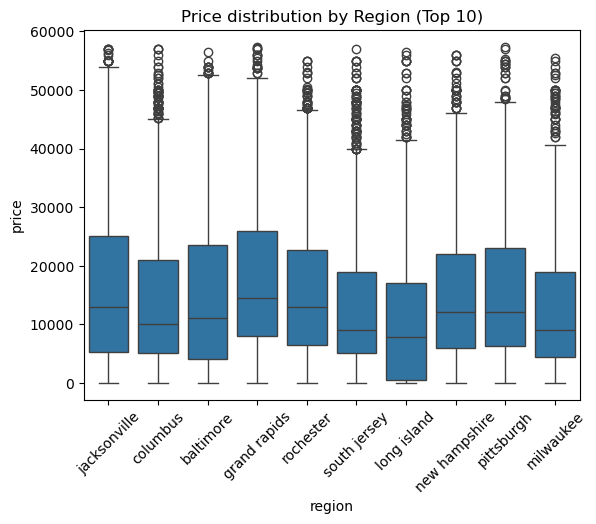

In [51]:
top_regions = df_clean['region'].value_counts().index[:10]
sns.boxplot(x='region', y='price', data=df_clean[df_clean['region'].isin(top_regions)])
plt.xticks(rotation=45)
plt.title("Price distribution by Region (Top 10)")
plt.show()

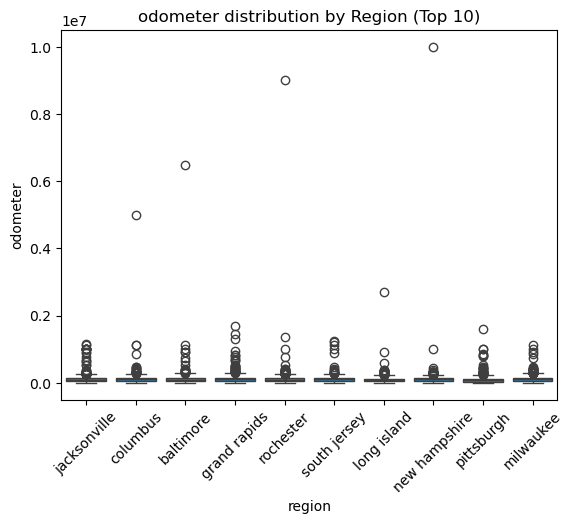

In [52]:
sns.boxplot(x='region', y='odometer', data=df_clean[df_clean['region'].isin(top_regions)])
plt.xticks(rotation=45)
plt.title("odometer distribution by Region (Top 10)")
plt.show()

In [53]:
Q1 = df_clean["odometer"].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

original=len(df_clean)
df_clean=df_clean[(df_clean['odometer']>=lower_bound)& (df_clean['odometer']<=upper_bound)]
print(f"original: {original}, new: {len(df_clean)} Entries dropped: ",original-len(df_clean))

original: 398295, new: 394176 Entries dropped:  4119


In [54]:
df_clean.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,4wd,full-size,pickup,white,al
28,auburn,22590,2010,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,4wd,full-size,pickup,blue,al
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,4wd,full-size,pickup,red,al
30,auburn,30990,2017,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,fwd,full-size,pickup,red,al
31,auburn,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


In [55]:
df_clean.drop('region',axis='columns',inplace=True)

In [56]:
cat_col=df_clean.select_dtypes(object).columns.to_list()
cat_col

['manufacturer',
 'model',
 'condition',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [57]:
for a1 in cat_col:
    print(a1, df_clean[a1].nunique())

manufacturer 41
model 26179
condition 6
fuel 5
title_status 6
transmission 3
drive 3
size 4
type 13
paint_color 12
state 51


#### Pre-Processing Data (Label Encoding, Scaling)

In [58]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for f in cat_col:
    df_clean[f]=lab.fit_transform(df_clean[[f]])
df_clean

/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-v

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,33590,2014,14,21504,2,8,2,57923.0,0,2,0,1,8,10,1
28,22590,2010,7,21838,2,8,2,71229.0,0,2,0,1,8,1,1
29,39590,2020,7,21863,2,8,2,19160.0,0,2,0,1,8,8,1
30,30990,2017,38,24580,2,8,2,41124.0,0,2,1,1,8,8,1
31,15000,2013,13,12854,0,6,2,128000.0,0,0,2,1,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019,30,17472,2,6,2,32226.0,0,2,1,2,9,10,50
426876,30590,2020,40,20885,2,6,2,12029.0,0,2,1,1,9,8,50
426877,34990,2020,6,25896,2,6,0,4174.0,0,2,0,1,4,10,50
426878,28990,2018,23,11977,2,6,2,30112.0,0,2,1,2,9,9,50


In [59]:
x=df_clean.drop('price',axis='columns')
y=df_clean['price']

In [60]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

for a1 in x.columns:
    x[a1]=scale.fit_transform(x[[a1]])
x

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,0.293400,-0.389302,0.966829,0.802033,1.670161,-0.048134,-0.544700,-0.17457,2.211624,-0.952197,-0.352440,0.414134,0.772082,-1.499664
28,-0.149094,-1.016474,1.015194,0.802033,1.670161,-0.048134,-0.323708,-0.17457,2.211624,-0.952197,-0.352440,0.414134,-1.479037,-1.499664
29,0.957142,-1.016474,1.018814,0.802033,1.670161,-0.048134,-1.188491,-0.17457,2.211624,-0.952197,-0.352440,0.414134,0.271834,-1.499664
30,0.625271,1.761004,1.412244,0.802033,1.670161,-0.048134,-0.823704,-0.17457,2.211624,0.376967,-0.352440,0.414134,0.271834,-1.499664
31,0.182777,-0.478898,-0.285718,-1.052386,0.028129,-0.048134,0.619167,-0.17457,-0.499038,1.706131,-0.352440,0.947056,-1.729161,-1.499664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,0.846519,1.044235,0.382983,0.802033,0.028129,-0.048134,-0.971486,-0.17457,2.211624,0.376967,1.446364,0.680595,0.772082,1.741857
426876,0.957142,1.940196,0.877196,0.802033,0.028129,-0.048134,-1.306926,-0.17457,2.211624,0.376967,-0.352440,0.680595,0.271834,1.741857
426877,0.957142,-1.106070,1.602805,0.802033,0.028129,-2.748945,-1.437385,-0.17457,2.211624,-0.952197,-0.352440,-0.651710,0.772082,1.741857
426878,0.735895,0.417063,-0.412711,0.802033,0.028129,-0.048134,-1.006596,-0.17457,2.211624,0.376967,1.446364,0.680595,0.521958,1.741857


In [61]:
from statsmodels.api import OLS
ols=OLS(y,x).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.136
Model:                            OLS   Adj. R-squared (uncentered):              0.136
Method:                 Least Squares   F-statistic:                              4425.
Date:                Sat, 30 Aug 2025   Prob (F-statistic):                        0.00
Time:                        04:40:45   Log-Likelihood:                     -4.4558e+06
No. Observations:              394176   AIC:                                  8.912e+06
Df Residuals:                  394162   BIC:                                  8.912e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [62]:
pvalues=ols.pvalues.reset_index()
pvalues

,index,0
0,year,0.000000e+00
1,manufacturer,9.156653e-01
2,model,3.587804e-02
3,condition,5.600589e-140
4,cylinders,0.000000e+00
5,fuel,0.000000e+00
6,odometer,0.000000e+00
7,title_status,1.325119e-80
8,transmission,0.000000e+00
9,drive,4.175826e-285


In [63]:
required_col=pvalues[pvalues[0]<0.05]['index'].values
required_col

array(['year', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'paint_color'],
      dtype=object)

In [64]:
x=x[required_col]
x

,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,paint_color
27,0.293400,0.966829,0.802033,1.670161,-0.048134,-0.544700,-0.17457,2.211624,-0.952197,0.772082
28,-0.149094,1.015194,0.802033,1.670161,-0.048134,-0.323708,-0.17457,2.211624,-0.952197,-1.479037
29,0.957142,1.018814,0.802033,1.670161,-0.048134,-1.188491,-0.17457,2.211624,-0.952197,0.271834
30,0.625271,1.412244,0.802033,1.670161,-0.048134,-0.823704,-0.17457,2.211624,0.376967,0.271834
31,0.182777,-0.285718,-1.052386,0.028129,-0.048134,0.619167,-0.17457,-0.499038,1.706131,-1.729161
...,...,...,...,...,...,...,...,...,...,...
426875,0.846519,0.382983,0.802033,0.028129,-0.048134,-0.971486,-0.17457,2.211624,0.376967,0.772082
426876,0.957142,0.877196,0.802033,0.028129,-0.048134,-1.306926,-0.17457,2.211624,0.376967,0.271834
426877,0.957142,1.602805,0.802033,0.028129,-2.748945,-1.437385,-0.17457,2.211624,-0.952197,0.772082
426878,0.735895,-0.412711,0.802033,0.028129,-0.048134,-1.006596,-0.17457,2.211624,0.376967,0.521958


##### Splitting data

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [66]:
x_train

,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,paint_color
386037,0.404024,-1.465575,0.802033,0.028129,-2.748945,1.879197,-0.17457,-0.499038,1.706131,0.772082
270452,-3.578427,0.448434,-1.052386,-1.613903,-0.048134,-1.442101,-0.17457,0.856293,-0.952197,0.772082
128451,-0.923460,-0.355658,-1.052386,0.028129,-0.048134,0.486300,-0.17457,-0.499038,1.706131,0.772082
75360,0.182777,-0.474686,-1.052386,0.028129,-0.048134,0.437571,-0.17457,-0.499038,-0.952197,0.772082
329408,0.625271,1.516358,0.802033,0.028129,2.652678,-0.939498,-0.17457,2.211624,-0.952197,0.772082
...,...,...,...,...,...,...,...,...,...,...
348347,0.625271,-1.982377,0.802033,0.028129,2.652678,-1.200781,-0.17457,-0.499038,1.706131,-1.479037
82676,0.182777,1.104248,-1.052386,0.028129,-0.048134,0.228255,-0.17457,-0.499038,0.376967,0.772082
142856,0.514648,-0.638169,0.802033,0.028129,-0.048134,-1.389187,-0.17457,-0.499038,0.376967,-1.479037
399630,0.735895,-0.791805,0.802033,0.028129,-0.048134,-1.149096,-0.17457,-0.499038,0.376967,0.772082


In [67]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((275923, 10), (118253, 10), (275923,), (118253,))

##### Training Models

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01),
    "RandomForest": RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=2, max_features="sqrt", random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=60, max_depth=3, learning_rate=0.1, subsample=1.0, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, random_state=42, use_label_encoder=False, eval_metric='rmse'),
    "LightGBM": LGBMRegressor(n_estimators=200, max_depth=-1, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, random_state=42),
}


In [69]:
results = []

for (name,model) in models.items():
    print(f"{name}")
    grid=model
    grid.fit(x_train, y_train)
    
    # Predictions
    y_pred = grid.predict(x_test)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append({
        "Model": name,
        "R²": r2,
        "MSE": mse
    })

LinearRegression
Ridge
Lasso
ElasticNet
RandomForest
GradientBoosting
XGBoost


/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [04:41:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1754002185082/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 275923, number of used features: 10
[LightGBM] [Info] Start training from score 16554.289545


In [70]:
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R²", ascending=False))

              Model        R²           MSE
6           XGBoost  0.624857  6.436293e+07
7          LightGBM  0.617461  6.563181e+07
4      RandomForest  0.554934  7.635952e+07
5  GradientBoosting  0.499444  8.587991e+07
3        ElasticNet  0.348740  1.117360e+08
2             Lasso  0.348696  1.117435e+08
1             Ridge  0.348696  1.117435e+08
0  LinearRegression  0.348696  1.117435e+08


##### HyperParameter Tuning using RandomizedSearch

In [71]:
from sklearn.model_selection import RandomizedSearchCV

models_and_params = {
    "RandomForest": (
        RandomForestRegressor(random_state=42),
        {
            "n_estimators": [50, 100],
            "max_depth": [10, 20],
            "min_samples_split": [2, 5],
            "max_features": ["sqrt", "log2"]
        }
    ),
    "GradientBoosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "n_estimators": [50, 100],
            "max_depth": [3, 5],
            "learning_rate": [0.01, 0.05],
            "subsample": [0.6, 0.8]
        }
    ),
    "XGBoost": (
        XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse'),
        {
            "n_estimators": [100, 150],
            "max_depth": [4, 6],
            "learning_rate": [0.01, 0.05],
            "subsample": [0.6, 0.8],
            "colsample_bytree": [0.6, 0.8]
        }
    ),
    "LightGBM": (
        LGBMRegressor(random_state=42),
        {
            "n_estimators": [100, 150],
            "max_depth": [-1, 5],
            "learning_rate": [0.01, 0.05],
            "subsample": [0.6, 0.8],
            "colsample_bytree": [0.6, 0.8]
        }
    ),
}


In [72]:
results = []

for name, (model, param_dist) in models_and_params.items():
    print(f"Tuning {name} with RandomizedSearchCV...")
    
    rand_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=10,              # number of random parameter combinations to try
        scoring='r2',
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=1
    )
    
    rand_search.fit(x_train, y_train)
    
    best_model = rand_search.best_estimator_
    best_params = rand_search.best_params_
    
    y_pred = best_model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Best Params": best_params,
        "R²": r2,
        "MSE": mse
    })

Tuning RandomForest with RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuning GradientBoosting with RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuning XGBoost with RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [04:53:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1754002185082/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [04:53:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1754002185082/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [04:53:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1754002185082/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-package

Tuning LightGBM with RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 183948, number of used features: 10
[LightGBM] [Info] Start training from score 16557.606699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [74]:
df_results = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print(df_results)

              Model                                        Best Params  \
0      RandomForest  {'n_estimators': 100, 'min_samples_split': 2, ...   
2           XGBoost  {'subsample': 0.6, 'n_estimators': 150, 'max_d...   
3          LightGBM  {'subsample': 0.6, 'n_estimators': 100, 'max_d...   
1  GradientBoosting  {'subsample': 0.6, 'n_estimators': 100, 'max_d...   

         R²           MSE  
0  0.752612  4.244403e+07  
2  0.581765  7.175621e+07  
3  0.564104  7.478614e+07  
1  0.543229  7.836766e+07  


In [75]:
df_results

,Model,Best Params,R²,MSE
0,RandomForest,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.752612,4.244403e+07
2,XGBoost,"{'subsample': 0.6, 'n_estimators': 150, 'max_d...",0.581765,7.175621e+07
3,LightGBM,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.564104,7.478614e+07
1,GradientBoosting,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.543229,7.836766e+07


In [76]:
df_results.iloc[0,1]

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 20}

## Best Model

In [77]:
best_model=RandomForestRegressor(n_estimators=100,min_samples_split=2,max_features='log2',max_depth=20)

In [78]:
best_model.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
y_pred=best_model.predict(x_test)

In [80]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [81]:
print(f"R2 score: {r2}, MSE: {mse}, RMSE: {mse**0.5}")

R2 score: 0.7507430202125553, MSE: 42764756.721012525, RMSE: 6539.476792604476
